**Name : Vaibhav Patel** \
**Section : Cse 2** \
**Scholar Number : 211112262**

# Lab 7

### Apply Different Types of Clustering Algorithms.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [21]:
df=pd.read_csv("ecoli.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ecoli.csv'

In [56]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## K Means Clustering

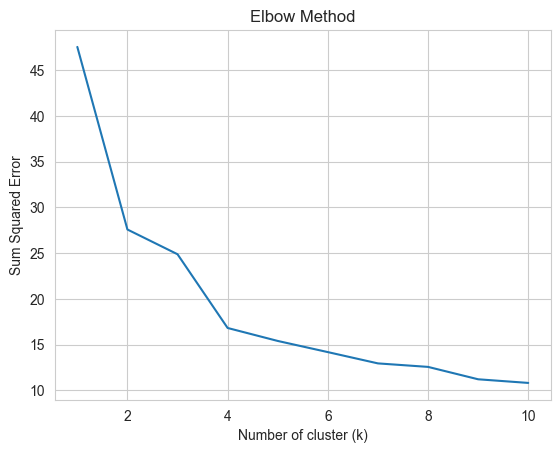

In [57]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(x_train)
    sse.append(km.inertia_)

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error", title ='Elbow Method')

plt.show()

In [58]:
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(x_train)
kmeans.cluster_centers_

array([[0.32911765, 0.48441176, 0.48      , 0.5       , 0.53911765,
        0.75735294, 0.75294118],
       [0.3536036 , 0.40459459, 0.48      , 0.5       , 0.45126126,
        0.31531532, 0.38324324],
       [0.69847458, 0.48559322, 0.49762712, 0.5       , 0.56694915,
        0.75711864, 0.76661017],
       [0.66515625, 0.6778125 , 0.52875   , 0.5078125 , 0.49453125,
        0.46796875, 0.33890625]])

In [59]:
kmeans.inertia_

16.811887122921775

In [60]:
pred = kmeans.fit_predict(x_test)
pred

array([0, 0, 1, 0, 1, 0, 2, 3, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 3, 2,
       0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       0, 2])

In [61]:
kmeans.n_iter_

3

## DBSCAN (density-based spatial clustering of applications with noise)

    mcg   gvh   lip  chg   aac  alm1  alm2  class
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35      1
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44      1
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46      1
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36      1
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35      1


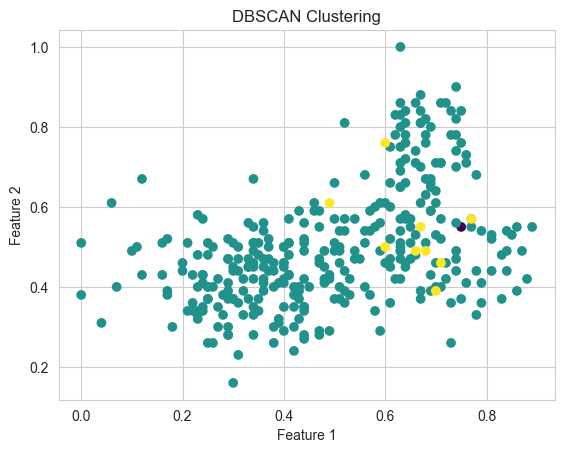

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

data = pd.read_csv("ecoli.csv")


print(data.head())

X = data.drop(columns=["class"])

dbscan = DBSCAN(eps=0.5, min_samples=5) 
labels = dbscan.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()

## Hierarchical clustering techniques (Agglomerative Clustering)

    mcg   gvh   lip  chg   aac  alm1  alm2  class
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35      1
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44      1
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46      1
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36      1
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35      1


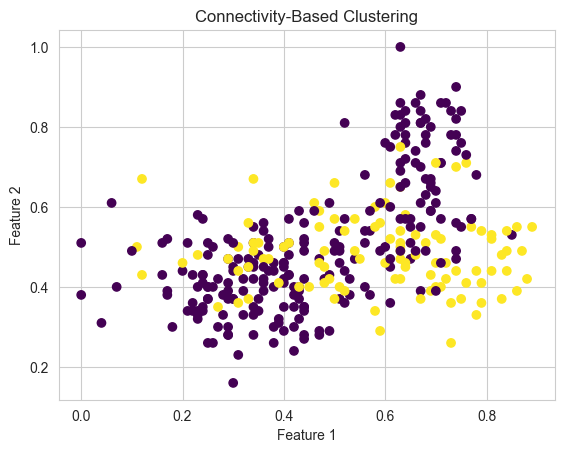

In [63]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

data = pd.read_csv("ecoli.csv")

print(data.head())

X = data.drop(columns=["class"])

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

agglomerative = AgglomerativeClustering(n_clusters=2, connectivity=connectivity)
labels = agglomerative.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Connectivity-Based Clustering")
plt.show()

## Gaussian Mixture Model

    mcg   gvh   lip  chg   aac  alm1  alm2  class
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35      1
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44      1
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46      1
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36      1
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35      1


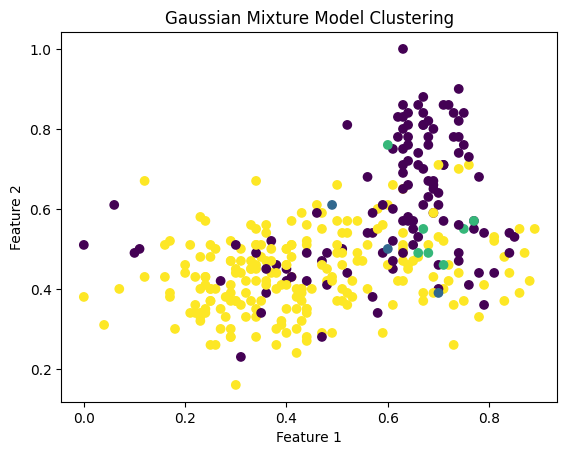

In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


data = pd.read_csv("ecoli.csv")

print(data.head())

X = data.drop(columns=["class"])


gmm = GaussianMixture(n_components=4)  
labels = gmm.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Gaussian Mixture Model Clustering")
plt.show()